In [1]:
%matplotlib inline
import tensorflow as tf
import os
import skimage.io
import matplotlib.pyplot as plt

In [2]:
data_folder="/Users/kanhua/Dropbox/Programming/lyft-challenge/data"
test_file=os.path.join(data_folder,"CameraRGB/258.png")
test_file_label=os.path.join(data_folder,"CameraSeg/258.png")

In [3]:
test_image=skimage.io.imread(test_file)

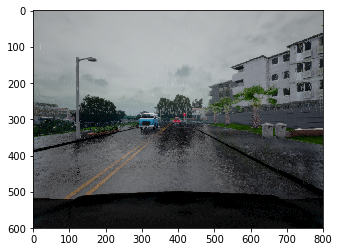

In [4]:
plt.imshow(test_image)

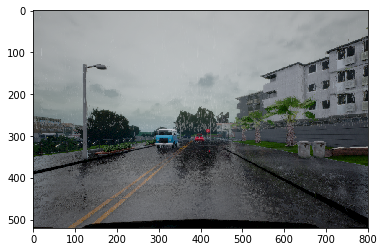

In [14]:
#cropping with numpy
y_max=520
plt.imshow(test_image[0:y_max,:])

In [5]:
image_pl=tf.placeholder(tf.uint8,[None,None,3])
cropped_image=tf.image.crop_to_bounding_box(image_pl,100,100,300,300)

In [6]:
with tf.Session() as sess:
    img=sess.run(cropped_image,feed_dict={image_pl:test_image})

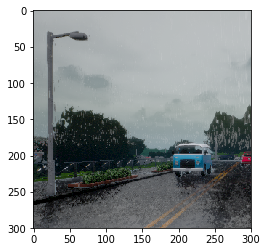

In [7]:
plt.imshow(img)

In [8]:
from inception_preprocessing import preprocess_for_train

0.8683333333333333


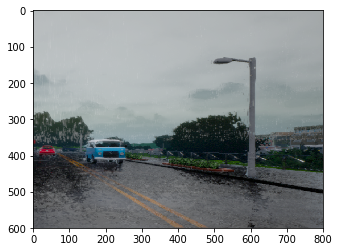

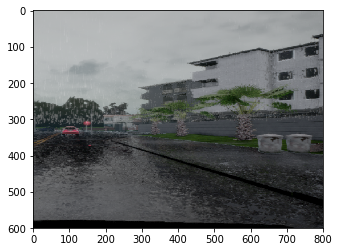

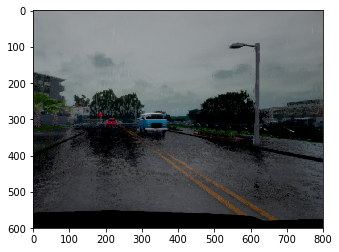

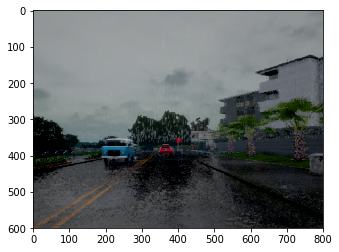

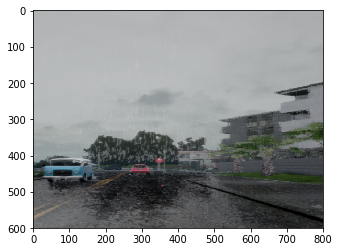

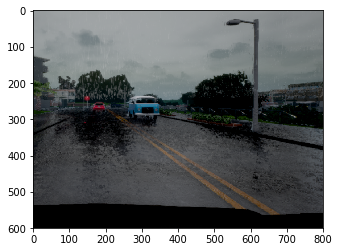

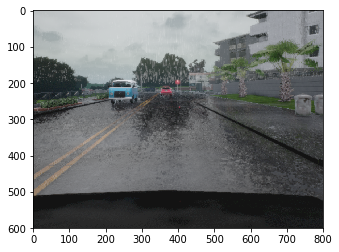

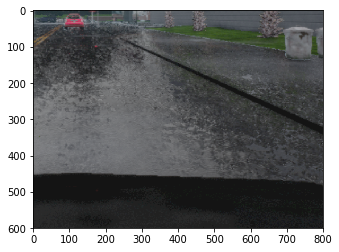

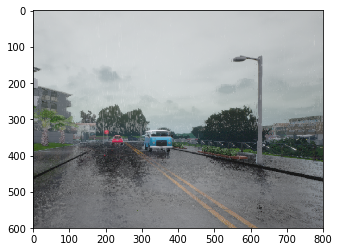

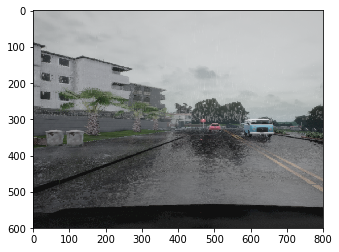

In [11]:
corner_h_ratio=521/600
print(corner_h_ratio)
incep_prop_graph=tf.Graph()
with incep_prop_graph.as_default() as df:
    image_pl=tf.placeholder(tf.uint8,[None,None,3])
    bbox=tf.constant([[[0.2,0.2,]]])
    ip_train_image=preprocess_for_train(image_pl,600,800,bbox=)
with tf.Session(graph=incep_prop_graph) as sess:
    for i in range(10):
        img=sess.run(ip_train_image,feed_dict={image_pl:test_image})
        plt.figure()
        plt.imshow((img+1)/2)

In [10]:
corner_h_ratio=521/600
print(corner_h_ratio)
image_float=tf.divide(image_pl,255)
image_pl_batch=tf.expand_dims(image_float,0)
boxes=tf.constant([[[0.2,0.2,0.8,0.4],[0.3,0.2,0.9,0.9]]])
ip_train_image=tf.image.draw_bounding_boxes(image_pl_batch,boxes=boxes)
with tf.Session() as sess:
    img=sess.run(ip_train_image,feed_dict={image_pl:test_image})
    plt.figure()
    plt.imshow(img[0])

0.8683333333333333


ValueError: Tensor("Const:0", shape=(1, 2, 4), dtype=float32) must be from the same graph as Tensor("ExpandDims:0", shape=(1, ?, ?, 3), dtype=float32).

In [ ]:
corner_h_ratio=521/600
print(corner_h_ratio)
boxes=tf.constant([[0.2,0.2,0.8,0.4],[0.3,0.2,0.9,0.9]])
ip_train_image=tf.image.crop_and_resize(
    image_pl,
    boxes=boxes,
    box_ind=0,
    crop_size=(224,224),
    method='bilinear',
    extrapolation_value=0,
    name=None)
with tf.Session() as sess:
    img=sess.run(ip_train_image,feed_dict={image_pl:test_image})
    plt.figure()
    plt.imshow(img)